In [13]:
# Import necessary libraries
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
# Load the dataset 
data = pd.read_csv('buddymove_holidayiq.csv')
print(data.head())

  User Id  Sports  Religious  Nature  Theatre  Shopping  Picnic
0  User 1       2         77      79       69        68      95
1  User 2       2         62      76       76        69      68
2  User 3       2         50      97       87        50      75
3  User 4       2         68      77       95        76      61
4  User 5       2         98      54       59        95      86


In [15]:
# Selecting relevant columns for clustering
X = data[['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']]

# Summary of the dataset
summary = data.describe()
summary



,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


In [16]:
# Normalize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.51259241, -1.01204846, -0.99935096, -1.47740275, -1.07616344,
        -0.7799621 ],
       [-1.51259241, -1.47517037, -1.06521607, -1.25911734, -1.05205506,
        -1.60900323],
       [-1.51259241, -1.8456679 , -0.60416029, -0.91609741, -1.51011437,
        -1.39406664],
       ...,
       [ 1.2133582 ,  0.43906685,  1.1741977 , -0.3859757 ,  1.09359119,
         1.64575086],
       [ 1.2133582 ,  0.71693999,  0.53750163,  0.70545136,  0.7560738 ,
         2.84325472],
       [ 1.2133582 ,  1.02568793,  0.53750163,  0.70545136,  1.11769958,
         0.69388881]])

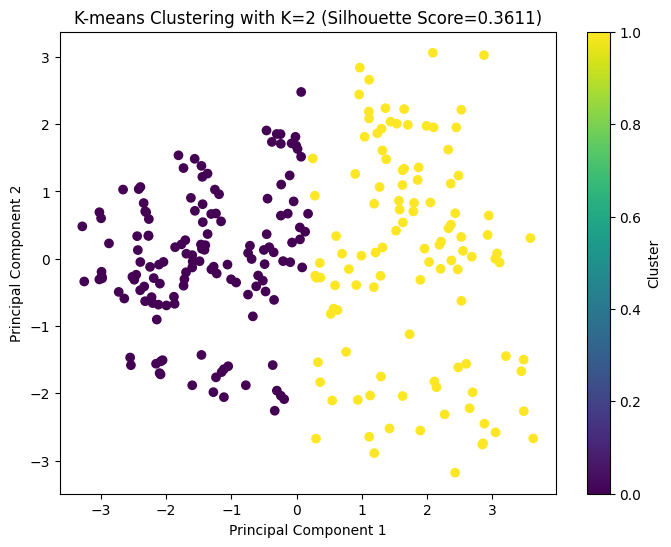

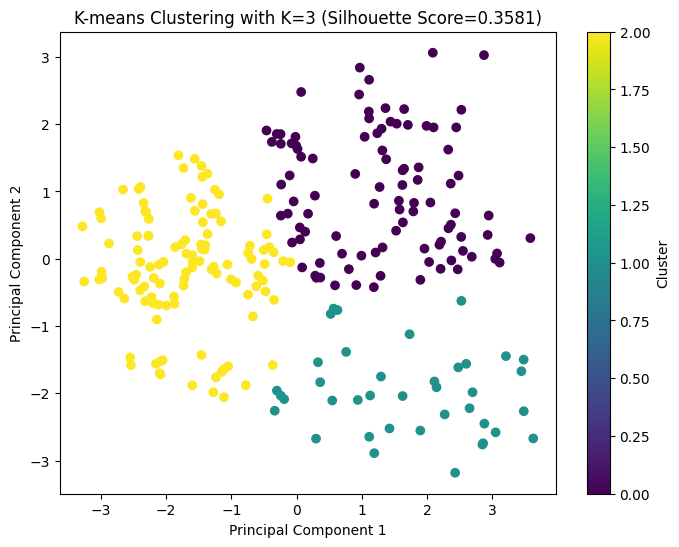

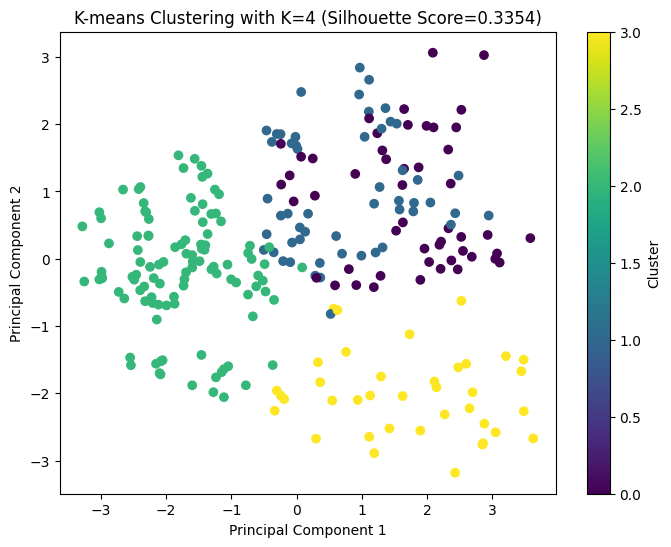

In [17]:

# Perform K-means clustering
kmeans_results = {}
K_values = [2, 3, 4]

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    kmeans_results[K] = (labels, silhouette_avg)
    # Save the result
    data[f'KMeans_{K}'] = labels

    # Visualize K-means clustering results using PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'K-means Clustering with K={K} (Silhouette Score={silhouette_avg:.4f})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.savefig(f'kmeans_k{K}.png')
    plt.show()

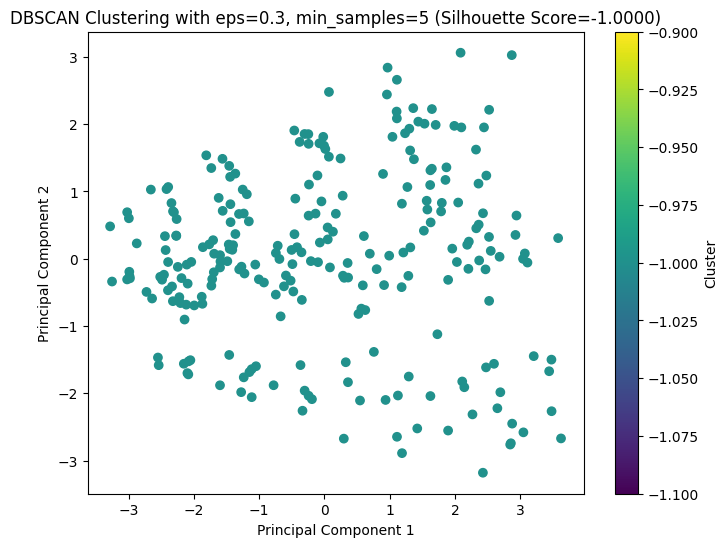

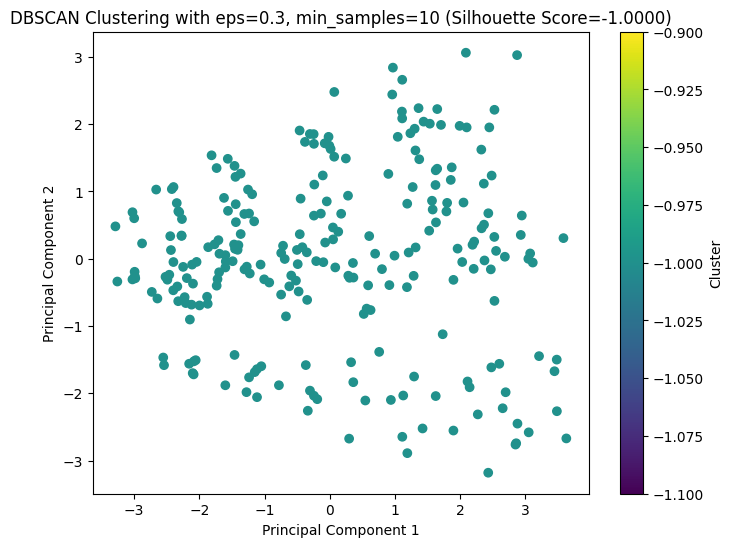

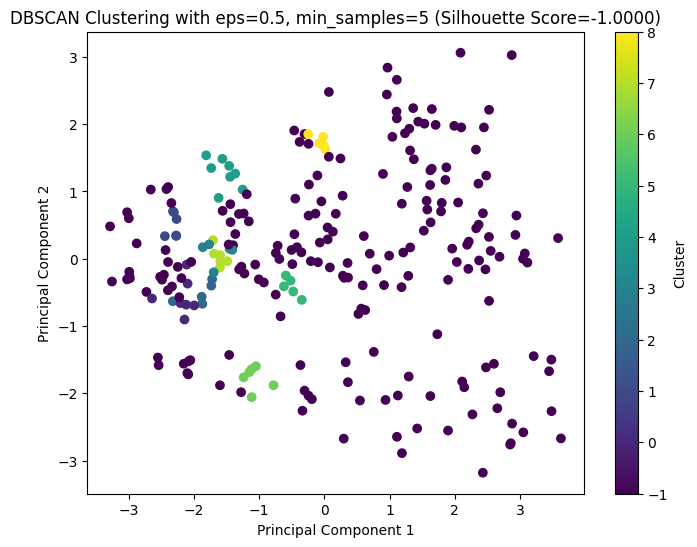

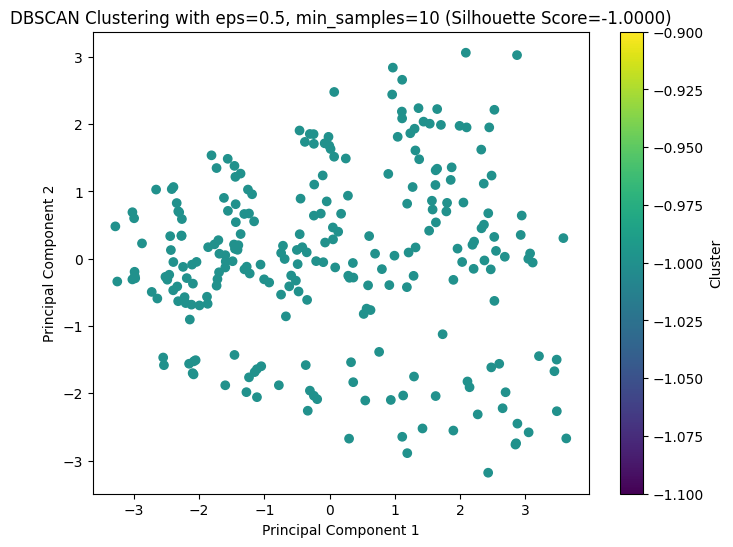

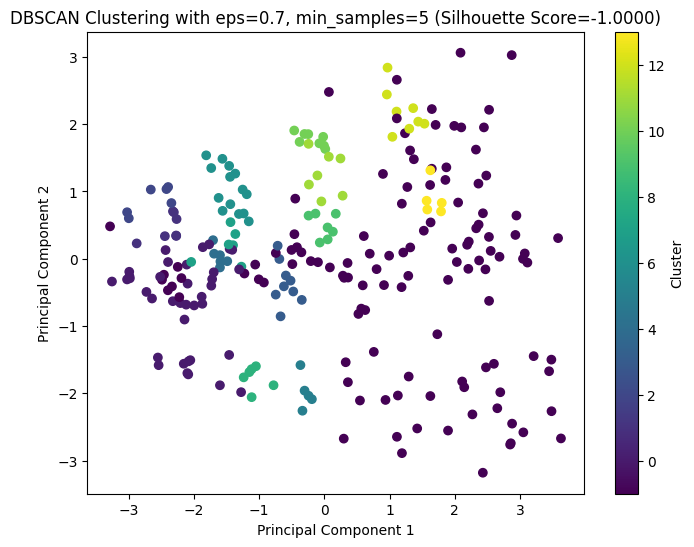

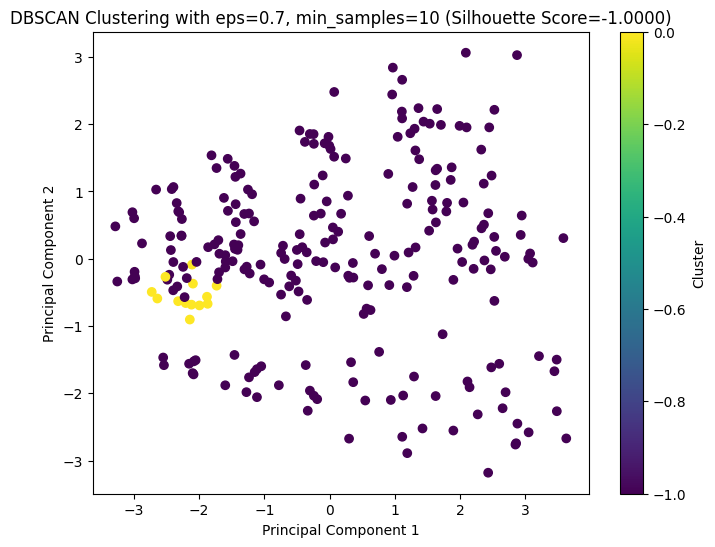

In [18]:
# Perform DBSCAN Clustering
dbscan_results = {}
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Calculate the silhouette score if there are more than 1 cluster and labels are not all -1
        if len(set(labels)) > 1 and -1 not in set(labels):
            silhouette_avg = silhouette_score(X_scaled, labels)
        else:
            silhouette_avg = -1  # Invalid silhouette score
        
        # Count the number of clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Save the results in a dictionary
        dbscan_results[(eps, min_samples)] = (labels, n_clusters, n_noise, silhouette_avg)
        
        # Save the cluster labels in the DataFrame
        data[f'DBSCAN_eps{eps}_min{min_samples}'] = labels

        # Visualize DBSCAN clustering results using PCA for dimensionality reduction
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(X_scaled)

        plt.figure(figsize=(8, 6))
        plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o')
        plt.title(f'DBSCAN Clustering with eps={eps}, min_samples={min_samples} (Silhouette Score={silhouette_avg:.4f})')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.savefig(f'dbscan_eps{eps}_min{min_samples}.png')
        plt.show()


In [19]:
# Save the results to an output file
with open("clustering_output.txt", "w") as f:
    f.write("Summary of the dataset:\n")
    f.write(data.describe().to_string())

    f.write("\n\nK-means Clustering Results:\n")
    for K, (labels, silhouette_avg) in kmeans_results.items():
        f.write(f"\nK={K}, Silhouette Score={silhouette_avg:.4f}\n")
        f.write(f"Cluster labels: {np.unique(labels, return_counts=True)}\n")

    f.write("\nDBSCAN Clustering Results:\n")
    for (eps, min_samples), (labels, n_clusters, n_noise, silhouette_avg) in dbscan_results.items():
        f.write(f"\neps={eps}, min_samples={min_samples}, Clusters={n_clusters}, Noise={n_noise}, Silhouette Score={silhouette_avg:.4f}\n")
        f.write(f"Cluster labels: {np.unique(labels, return_counts=True)}\n")